## Python Libraries - Pandas - Grouping and Pivoting

### Grouping

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

Grouping analysis can be thought of as having three parts, namely:
-  Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
-  Applying a function to each group (e.g., the mean or total sales of each customer segment)
-  Combining the results into a data structure showing summary statistics


In [24]:
# Loading libraries and file - sales.xlsx - with Market and Region as index
import pandas as pd 
import numpy as np


sales =  pd.read_excel("sales.xlsx" , index_col = [0,1])

In [25]:
# Checking the 'sales' dataframe 
sales.head(10)

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77

In [27]:
# Grouping the sales dataframe for the sum of the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").sum()


,No_of_Orders
Market,
Africa,731
Asia Pacific,2481
Europe,1910
LATAM,1714
USCA,1593


In [28]:
# Grouping the sales dataframe over the index 'Market' for the sum of the columns 'No_of_Orders' and 'Sales'
sales[["No_of_Orders" , "Sales"]].groupby("Market").sum()


,No_of_Orders,Sales
Market,,
Africa,731,322367.04
Asia Pacific,2481,1537454.71
Europe,1910,1233569.09
LATAM,1714,788713.82
USCA,1593,862452.84


In [29]:
# Grouping the sales dataframe over the index 'Market' for the maximum value in the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [30]:
# Creating a dataframe 'df' with the mean of column 'Profit' for each market
sales[["Profit"]].groupby("Market").mean()

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


In [ ]:
# Plotting a bar graph over 'df'


### Pivoting

You may want to use pandas pivot tables as an alternative to ```groupby()```. They provide Excel-like functionalities to create aggregate tables. 

In [31]:
# Read the help documentation for pivot_table
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.frame:

pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The

In [32]:
# Importing the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Create a new dataframe
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})
users.set_index("weekday" ,inplace = True)
users

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


In [44]:
# Set the index of the dataframe as 'weekday'
users.pivot(columns='city', values='visitors')

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


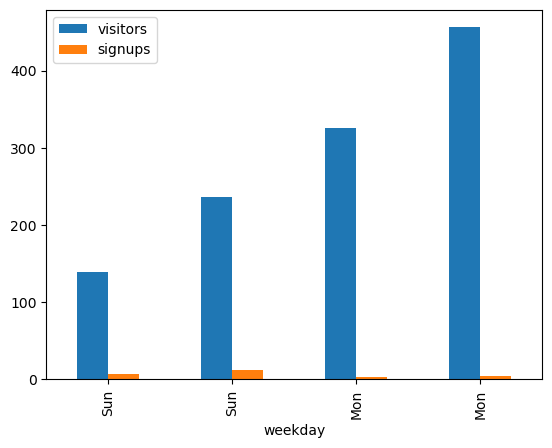

In [36]:
# plot a bar graph over the dataframe 'users'
users.plot(kind = "bar")
plt.show()

In [37]:
# Create a pivot table with the columns as 'city' summarising the variable 'visitors'
visitors_pivot = users.pivot(columns = "city" , values = "visitors")
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [ ]:
# Check the created pivot table


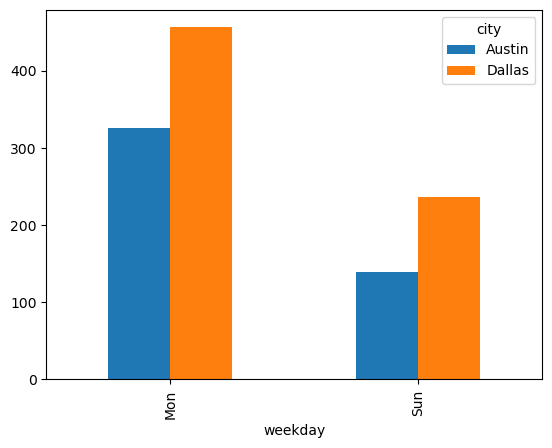

In [47]:
# Draw a bar graph over the created pivot
visitors_pivot.plot(kind = "bar")
plt.show()

In [39]:
# Create a pivot table with the columns as 'city' summarising all the variables
visitors_signups = users.pivot(columns = "city")
visitors_signups

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

In [ ]:
# Check the created pivot table


visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

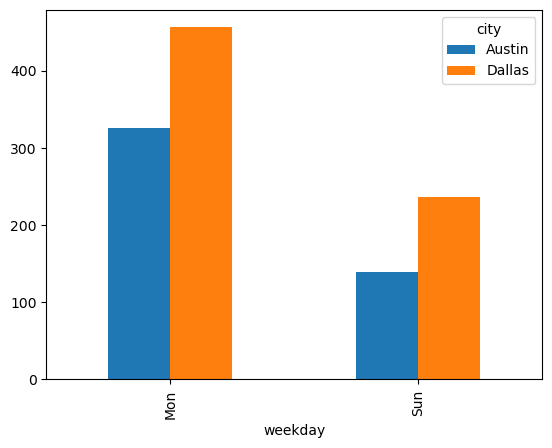

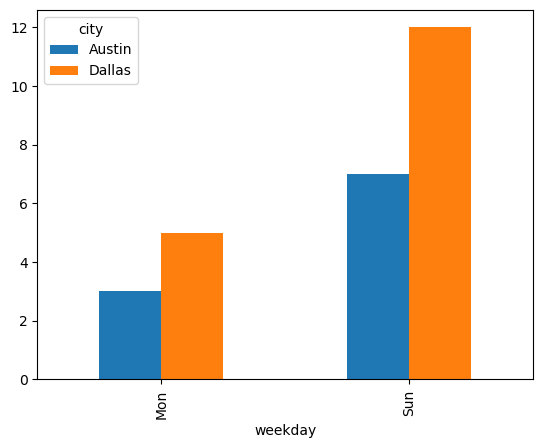

In [40]:
# Draw a bar graph over the created pivot for each variable
visitors_signups["visitors"].plot(kind = "bar")
visitors_signups["signups"].plot(kind = "bar")
visitors_signups